# Preprocessing Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('bmh')
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

import os
os.chdir('C:/Users/j_hor/Documents/Coderhouse/Data Science/Data/Raw')
df = pd.read_csv('framingham.csv')

In [2]:
# DataFrame´s columns. For reference visit https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [3]:
print(df.shape)
df.head()

(4238, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Checking values
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.shape

(3656, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Normality Analysis

Normality distribution is a must starting point for some parametric tests (such as t-test and ANOVA) and regression models.

In [8]:
# Filtering by current smokers (1= currentSmoker)
df = df[df.currentSmoker>0]
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


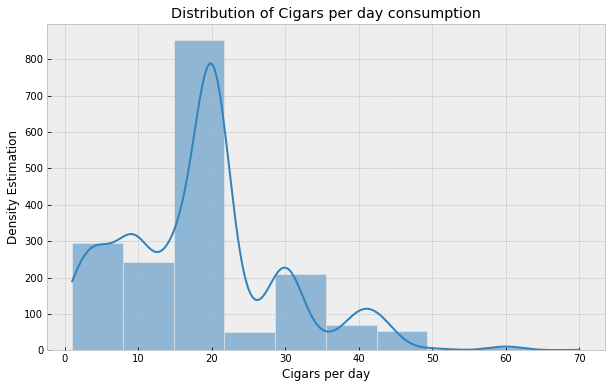

In [9]:
# Plotting distribution
cigars_perday = df.cigsPerDay
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x=cigars_perday, bins=10, color="#3182bd", alpha=0.5, kde=True)
ax.set_title('Distribution of Cigars per day consumption')
ax.set_xlabel('Cigars per day')
ax.set_ylabel('Density Estimation');

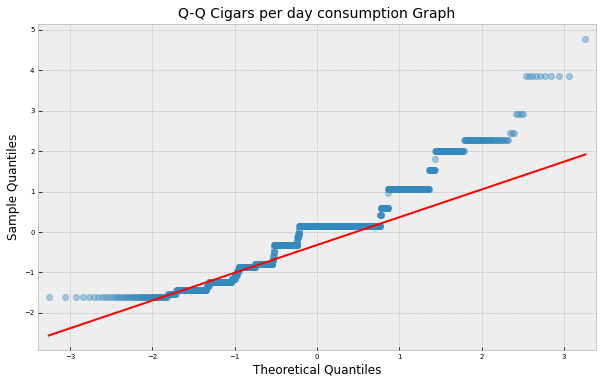

In [10]:
# Theoretical Quantiles Graph
fig, ax = plt.subplots(figsize=(10,6))
sm.qqplot(
    cigars_perday,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Q-Q Cigars per day consumption Graph', fontsize = 14)
ax.tick_params(labelsize = 7)

In [11]:
# Asymmetry statistics. There is a low deviation from normality
kurtosis = stats.kurtosis(cigars_perday)
skewness = stats.skew(cigars_perday)
print(kurtosis)
print(skewness)

0.8903177553805048
0.7073956586904797


In [12]:
# Hypothesis tests
# Shapiro-Wilk test
shapiro_test = stats.shapiro(cigars_perday)
shapiro_test

ShapiroResult(statistic=0.9263354539871216, pvalue=9.210269448749244e-29)

In [13]:
# D'Agostino's K-squared test
k2, p_value = stats.normaltest(cigars_perday)
print(k2)
print(p_value)

154.07776247304932
3.4868959410320132e-34


In [ ]:
# After plotting and testing the data, we can not say there is evidence to reject normality distribution for this sample.

# Homocedasticity Analysis

Evaluating homocedasticity is a key first step in order to build up an optimized linear regression model, minimizing variance.

In [14]:
# Both gender classes have a high number of observations (0=Female; 1=Male)
df.male.value_counts().sort_index()

0    807
1    981
Name: male, dtype: int64

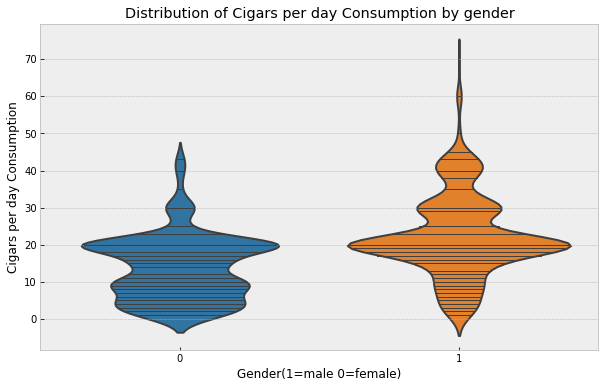

In [15]:
# Graphic Analysis. Violinplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(
               x = 'male',
               y = 'cigsPerDay',
            data = df,
         palette = 'tab10',
           inner = 'stick'
            )
ax.set_title('Distribution of Cigars per day Consumption by gender')
ax.set_xlabel('Gender(1=male 0=female)')
ax.set_ylabel('Cigars per day Consumption');

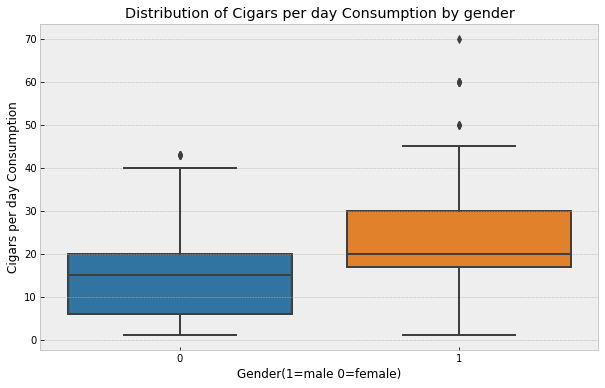

In [16]:
# Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
            x = 'male',
            y = 'cigsPerDay',
         data = df,
      palette = 'tab10',
           ax = ax
            )
ax.set_title('Distribution of Cigars per day Consumption by gender')
ax.set_xlabel('Gender(1=male 0=female)')
ax.set_ylabel('Cigars per day Consumption');

In [17]:
# Bartlett Test. We assume a normal distribution for these samples (based on the normality analysis made above)
cigs_perday_male = df[df.male>0]
cigs_perday_male = cigs_perday_male.cigsPerDay
cigs_perday_female = df[df.male<1]
cigs_perday_female = cigs_perday_female.cigsPerDay

bartlett_test = stats.bartlett(cigs_perday_male, cigs_perday_female)
bartlett_test

BartlettResult(statistic=39.862941583412564, pvalue=2.7242316118525675e-10)

In [ ]:
# After plotting and testing the data, we can not say there is evidence to reject homocedasticity for these samples.